# Project name: Brain tumor detection with data science

## Data source: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

# The model was built using Keras as follow

In [3]:
# imports
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    #os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'D:/CodeClause/brain_mri/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'D:/CodeClause/brain_mri/val',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 1217 files belonging to 2 classes.
Found 220 files belonging to 2 classes.


In [4]:
# Define the model
model = keras.Sequential([
    layers.InputLayer(input_shape=[128, 128, 3]),
    
    # Data Augmentation
    preprocessing.RandomRotation(factor=0.10),

    # Block One
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])


Epoch 1/50
20/20 [==============================] - 246s 12s/step - loss: 0.6735 - binary_accuracy: 0.6565 - val_loss: 0.7274 - val_binary_accuracy: 0.5227
Epoch 2/50
20/20 [==============================] - 282s 14s/step - loss: 0.6231 - binary_accuracy: 0.6820 - val_loss: 0.8845 - val_binary_accuracy: 0.3045
Epoch 3/50
20/20 [==============================] - 263s 13s/step - loss: 0.5340 - binary_accuracy: 0.7124 - val_loss: 0.9261 - val_binary_accuracy: 0.3364
Epoch 4/50
20/20 [==============================] - 262s 13s/step - loss: 0.4045 - binary_accuracy: 0.8053 - val_loss: 0.7639 - val_binary_accuracy: 0.5545
Epoch 5/50
20/20 [==============================] - 260s 13s/step - loss: 0.3436 - binary_accuracy: 0.8299 - val_loss: 0.6707 - val_binary_accuracy: 0.7091
Epoch 6/50
20/20 [==============================] - 243s 12s/step - loss: 0.3257 - binary_accuracy: 0.8398 - val_loss: 0.8726 - val_binary_accuracy: 0.6182
Epoch 7/50
20/20 [==============================] - 285s 14s/ste

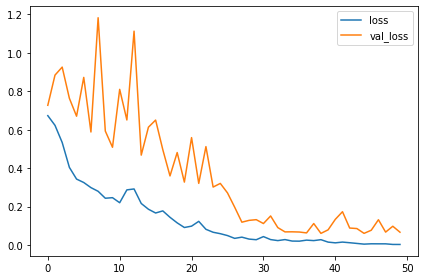

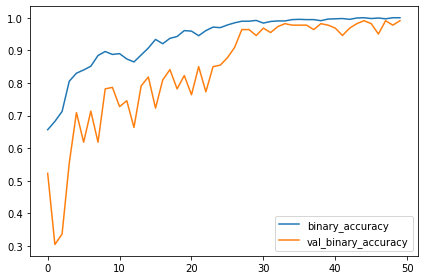

In [5]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
)

# Plot learning curves
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [25]:
# Saving the model
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = 'D:/CodeClause/tumors_model'
save_model(model, filepath)

INFO:tensorflow:Assets written to: D:/CodeClause/tumors_model\assets


INFO:tensorflow:Assets written to: D:/CodeClause/tumors_model\assets
